In [5]:
import tensorflow as tf


In [30]:
def train_mnist():
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('loss')<0.01):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
                
    callbacks = myCallback()

    mnist = tf.keras.datasets.fashion_mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()

    x_train = x_train[:300,:,:] / 255.0
    x_test = x_test[:300,:,:] / 255.0

    print(x_train.shape, x_test.shape)
    
    x_train = x_train.reshape(300, 28, 28, 1)
    y_train = y_train[:300]
    
    x_test = x_test.reshape(300, 28, 28, 1)
    y_test = y_test[:300]

    
    # очень важно правильно все зашейпить, иначе бяда
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),        
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    

    history = model.fit(
        x_train, y_train, epochs=2, callbacks=[callbacks]
    )

    
    
    # model fitting
    return model, history.epoch, history.history['accuracy'][-1]

In [32]:
model, history, acc = train_mnist()

(300, 28, 28) (300, 28, 28)
Epoch 1/2
10/10 [==============================] - 5s 490ms/step - loss: 1.7261 - accuracy: 0.4400
Epoch 2/2
10/10 [==============================] - 5s 497ms/step - loss: 0.9072 - accuracy: 0.6767


In [33]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


IndexError: too many indices for array

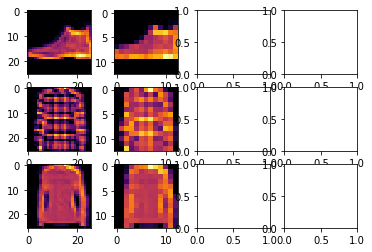

In [37]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train[:300,:,:] / 255.0
x_test = x_test[:300,:,:] / 255.0


    
x_train = x_train.reshape(300, 28, 28, 1)
y_train = y_train[:300]
   
test_images = x_test.reshape(300, 28, 28, 1)
y_test = y_test[:300]

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)